# Código do P.I.C
## Aprendizado de máquina
### Predição de valores

Quando estamos trabalhando compemrpesas de pequeno porte que adoram o simples nacional, temos que considerar os seguintes gastos operacionais:

- Simples nacional 
- IPTU 
- IPVA 
- Luz 
- Água e esgoto 
- 10 Funcionários 
- Contador 
- Internet e telefone 
- Risco de perda 
- Taxa de débito 
- Taxa de crédito 
- Adubo 

Ao todos essas podem ser consdieradas as despesas minimas da empresa. Lógico que ainda podem existir mais, contudo, iremos trabalhar a partir destas.

In [3]:
def calcular_taxa_real_simples_nacional(RBT12):
    # Defina as faixas de renda, taxas percentuais e parcelas dedutíveis
    faixas = [
        (180000.00, 0.04, 0),  # Faixa 1: até R$ 180.000,00 - 4%
        (360000.00, 0.073, 5940.00), # Faixa 2: até R$ 360.000,00 - 7.3%
        (720000.00, 0.095, 13860.00), # Faixa 3: até R$ 720.000,00 - 9.5%
        (1800000.00, 0.1070, 22500.00), # Faixa 4: até R$ 1.800.000,00 - 10.7%
        (3600000.00, 0.1430, 87300.00), # Faixa 5: até R$ 3.600.000,00 - 14.3%
        (4800000.00, 0.19, 378000.00) # Faixa 6: até R$ 4.800.000,00 - 19%
    ]
    
    # Calcule a taxa real com base na receita bruta total dos últimos 12 meses (RBT12)
    taxa_real = 0
    for limite, taxa, pd in faixas:
        if RBT12 <= limite:
            taxa_real = (RBT12 * taxa - pd) / RBT12
            break
    
    return taxa_real

# Solicite ao usuário que insira a receita bruta total dos últimos 12 meses
RBT12_usuario = float(input("Por favor, insira a receita bruta total dos últimos 12 meses (RBT12): R$ "))
taxa_real_calculada = calcular_taxa_real_simples_nacional(RBT12_usuario)
print(f"A Taxa Real do Simples Nacional para a receita bruta de R$ {RBT12_usuario} é de {taxa_real_calculada:.2%}")


A Taxa Real do Simples Nacional para a receita bruta de R$ 1200000.0 é de 8.82%


Como o simples nacional é uma cota unica com a junção de todos os tributos, seu percentual já engloba todos os tributos relatios a comercialização de produtos. 

O proximo tributo a ser calculado não precisa necessariamente de calculo, pois o governo já oferece o resultado dos calculos por metro quadrado. Trata-se do IPTU, que precisa ser comparado com o lucro total do mes para saber o quanto equivale da despesa

In [6]:
# Solicite ao usuário que insira o IPTU
IPTU_usuario = float(input("Por favor, insira o valor do seu IPTU: R$ "))
porcentagem_iptu = (IPTU_usuario / RBT12_usuario) * 100

print(f"A porcentagem do IPTU em relação ao RBT12 é de {porcentagem_iptu:.2f}%")

A porcentagem do IPTU em relação ao RBT12 é de 18.00%


A mesma coisa vale para o IPVA


In [ ]:
# Solicite ao usuário que insira o IPVA
IPVA_usuario = float(input("Por favor, insira o valor do seu IPVA: R$ "))
porcentagem_iptu = (IPVA_usuario / RBT12_usuario) * 100

print(f"A porcentagem do IPVA em relação ao RBT12 é de {porcentagem_iptu:.2f}%")

Agora vamos passar para o calculo da agua e seu consumo

Aqui está como o cálculo seria feito:

- Tarifa Fixa: R$ 24,31
- Consumo de Água:
- Primeiros 4m³: 4m³ x R$ 7,07 = R$ 28,28
- Próximos 3m³ (5 a 7m³): 3m³ x R$ 8,83 = R$ 26,49
- Próximos 3m³ (8 a 10m³): 3m³ x R$ 11,39 = R$ 34,17
- Próximos 30m³ (11 a 40m³): 30m³ x R$ 14,12 = R$ 423,60
- Consumo acima de 40m³: 10m³ x R$ 16,66 = R$ 166,60
- Total do Consumo de Água: R$ 28,28 + R$ 26,49 + R$ 34,17 + R$ 423,60 + R$ 166,60 = R$ 679,14
- Total Geral da Conta de Água: Tarifa Fixa + Total do Consumo de Água = R$ 24,31 + R$ 679,14 = R$ 703,45


Este é apenas um exemplo e o valor real dependerá do consumo exato de água.

In [ ]:
# Tarifas de água não residencial
tarifa_fixa = 24.31
faixas_consumo = [(0, 4, 7.07), (5, 7, 8.83), (8, 10, 11.39), (11, 40, 14.12), (41, float('inf'), 16.66)]

# Função para calcular a conta de água
def calcular_conta_agua(consumo):
    total = tarifa_fixa
    for faixa in faixas_consumo:
        inicio, fim, preco = faixa
        if consumo > inicio:
            total += min(consumo, fim) - inicio * preco
            consumo -= fim - inicio
    return total

# Solicitação de entrada do usuário
consumo_usuario = float(input("Digite o consumo de água em m³: "))

# Cálculo e exibição do resultado
total_conta = calcular_conta_agua(consumo_usuario)
print(f"O valor total da conta de água é: R$ {total_conta:.2f}")

Passando para a conta de luz, segundo as normativas da Neo Energia, do Distrito Federal, temos o seguinte calculo:

In [ ]:
def calcular_custo_energia(valor_conta_luz, consumo_kwh):
    # Constantes com as porcentagens dos impostos e taxas
    TAXA_ILUMINACAO_PUBLICA = 0.1215
    ICMS = 0.20
    PIS = 0.0029
    COFINS = 0.0135

    # Calcula o valor total de taxas e impostos
    valor_taxas_impostos = valor_conta_luz * (TAXA_ILUMINACAO_PUBLICA + ICMS + PIS + COFINS)

    # Calcula o custo efetivo do kWh
    custo_efetivo_kwh = (valor_conta_luz - valor_taxas_impostos) / consumo_kwh

    # Calcula o gasto diário
    gasto_diario = valor_conta_luz / 30

    # Calcula o gasto por hora
    gasto_por_hora = gasto_diario / 24

    # Calcula o gasto por minuto
    gasto_por_minuto = gasto_por_hora / 60

    # Calcula o gasto médio por caixa, assumindo 3,23 minutos por caixa
    gasto_por_caixa = 3.23 * gasto_por_minuto

    # Calcula a porcentagem do gasto da conta de luz em relação às despesas da empresa
    porcentagem_gasto_luz = (valor_conta_luz / RBT12_usuario) * 100

    # Imprime os resultados
    print(f"Custo efetivo por kWh: R${custo_efetivo_kwh:.2f}")
    print(f"Gasto diário: R${gasto_diario:.2f}")
    print(f"Gasto por hora: R${gasto_por_hora:.2f}")
    print(f"Gasto por minuto: R${gasto_por_minuto:.2f}")
    print(f"Gasto por caixa: R${gasto_por_caixa:.2f}")
    print(f"Porcentagem do gasto da conta de luz em relação às despesas da empresa: {porcentagem_gasto_luz:.2f}%")

# Exemplo de uso da função
valor_conta_luz = float(input("Digite o valor da conta de luz: R$"))
consumo_kwh = float(input("Digite o total consumido em kWh: "))

calcular_custo_energia(valor_conta_luz, consumo_kwh)


In [ ]:
def calcular_custo_final(salario_base, vale_transporte):
    # Constantes
    FGTS_SALARIO = 0.08
    DECIMO_TERCEIRO_PROP = 1/12
    FERIAS_PROP = 1/12
    TERCO_FERIAS = 1/3
    FGTS_FERIAS_PROV = 0.08 * FERIAS_PROP
    FGTS_DECIMO_TERCEIRO_PROV = 0.08 * DECIMO_TERCEIRO_PROP
    INSS_PATRONAL = 0.03
    INSS_PATRONAL_PROV = 0.03 * (DECIMO_TERCEIRO_PROP + FERIAS_PROP + TERCO_FERIAS)
    
    # Cálculos
    fgts_salario = salario_base * FGTS_SALARIO
    decimo_terceiro_prop = salario_base * DECIMO_TERCEIRO_PROP
    ferias_prop = salario_base * FERIAS_PROP
    terco_ferias = ferias_prop * TERCO_FERIAS
    fgts_ferias_prov = salario_base * FGTS_FERIAS_PROV
    fgts_decimo_terceiro_prov = salario_base * FGTS_DECIMO_TERCEIRO_PROV
    inss_patronal = salario_base * INSS_PATRONAL
    inss_patronal_prov = salario_base * INSS_PATRONAL_PROV
    
    custo_total = (salario_base + fgts_salario + decimo_terceiro_prop + ferias_prop +
                   terco_ferias + fgts_ferias_prov + fgts_decimo_terceiro_prov +
                   inss_patronal + inss_patronal_prov)
    
    # Descontos
    desconto_vale_transporte = vale_transporte
    desconto_inss = salario_base * 0.09  # Considerando a alíquota de 9% para o exemplo
    
    custo_final = custo_total - desconto_vale_transporte - desconto_inss
    
    return custo_final

# Exemplo de uso da função
salario_base = float(input("Digite o salário base do funcionário: R$"))
vale_transporte = float(input("Digite o valor do vale-transporte: R$"))

custo_final = calcular_custo_final(salario_base, vale_transporte)
print(f"O custo final após os descontos é: R${custo_final:.2f}")


In [ ]:
def calcular_custo_por_minuto(custo_mensal, horas_semanais=40):
    # Calcula o número de semanas em um mês
    semanas_por_mes = 4.33
    
    # Calcula o número total de horas trabalhadas por mês
    horas_por_mes = horas_semanais * semanas_por_mes
    
    # Converte horas em minutos
    minutos_por_mes = horas_por_mes * 60
    
    # Calcula o custo por minuto
    custo_por_minuto = custo_mensal / minutos_por_mes
    
    return custo_por_minuto

# Exemplo de uso da função
custo_mensal = float(input("Digite o custo mensal do funcionário: R$"))
custo_por_minuto = calcular_custo_por_minuto(custo_mensal)

print(f"O custo por minuto do funcionário é: R${custo_por_minuto:.2f}")

O contador aprensentou-se como um custo fixo que não seria necessário nenhuma função para seu calculo, apenas adicionar o custo ao final. 
Para calcular o custo da hora trabalhada de um funcionário, você pode usar a seguinte fórmula:

$$ \text{Custo da Hora Trabalhada} = \frac{\text{Salário Mensal}}{\text{Total de Horas Trabalhadas no Mês}} $$

Considerando que o funcionário trabalha **8 horas diárias** e **40 horas semanais**, ele trabalha um total de **40 horas** por semana. Para calcular o total de horas trabalhadas no mês, multiplicamos as horas semanais pelo número médio de semanas em um mês:

$$ \text{Total de Horas Trabalhadas no Mês} = 40 \text{ horas/semana} \times 4,33 \text{ semanas/mês} $$

$$ \text{Total de Horas Trabalhadas no Mês} = 173,2 \text{ horas/mês} $$

Agora, usando o salário mensal do funcionário de **R$ 4559,75**, o cálculo seria:

$$ \text{Custo da Hora Trabalhada} = \frac{4559,75}{173,2} $$

Portanto, o custo aproximado da hora trabalhada desse funcionário é de **R$ 26,34**.




O mesmo tambem se aplica as outras despesas:
- Internet e telefone - O pacote da TIM para serviços de banda larga está custando um valor de R$ 138,94 (cento e trinta e oito reais e noventa e quatro centavos) e para as linhas moveis a operadora Claro com o plano mais vendido está o equivalente a R$ 64,99 (sessenta e quatro reais e noventa e nove centavos). Essas despesas juntas ao mês equivalem a um total de R$ 203,93(duzentos e três reais e noventa e três centavos), o que daria um custo diário de R$ 6,80 (seis reais e oitenta centavos).


- Risco de perda - 2,22% ao dia


In [1]:
# Quantidade total inicial de plantas
total_plantas = 15

# Quantidade de perda em um período específico (1 planta a cada 3 dias)
perda = 1

# Cálculo do percentual de perda
percentual_perda = (perda / total_plantas) * 100

print(f"O percentual de perda é de aproximadamente {percentual_perda:.2f}% a cada 3 dias.")


O percentual de perda é de aproximadamente 6.67% a cada 3 dias.


Ao decidir qual máquina de cartão é mais adequada para seu MEI, leve em consideração quatro tipos de taxas:

•	Taxa de débito.
•	Taxa de crédito.
•	Taxa de crédito parcelado.
•	Taxa de antecipação, caso opte por receber os valores antes do prazo.

Marcas com políticas de tarifação mais transparentes tendem a ser mais fáceis de comparar durante a compra e de administrar no cotidiano.Tomemos como exemplo as taxas oferecidas pela Maquininha de Cartão MEI Fácil:

•	Taxa de débito: 0,99% (a mais vantajosa no mercado para MEIs).
•	Taxa de crédito antecipado (depósito em até 1 dia útil): 4,29%.
•	Taxa de crédito parcelado antecipado (depósito em até 1 dia útil): 4,29% + 1,60% por parcela.
•	Taxa de crédito (depósito em 30 dias): 3,11%.
•	Taxa de crédito parcelado (depósito em 30 dias): 3,90% por parcela.

Pesquisar amplamente é crucial para garantir a escolha da máquina com as menores taxas para o CNPJ MEI . E essas percentagens têm que ser adicionadas ao final do preço somada a outro fator que seria o imposto de comercialização. 

# Análise dos dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

2024-06-04 18:45:20.789865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_excel("DADOS GERAIS.xlsx")

In [3]:
df.head()

,ID. PLANTA,DIA,CRESCIMENTO,SOL,AGUA,FOLHA,QUALIDADE,DETALHE 1,DETALHE 2,ADUBO,VIGOR,COR,FLOR,QUALIDADE FLOR,PERCA DE MATERIAL,GANHO
0,1,1,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE,SIM,PERFEITA,0,0
1,1,2,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
2,1,3,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
3,1,4,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
4,1,5,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,1,0


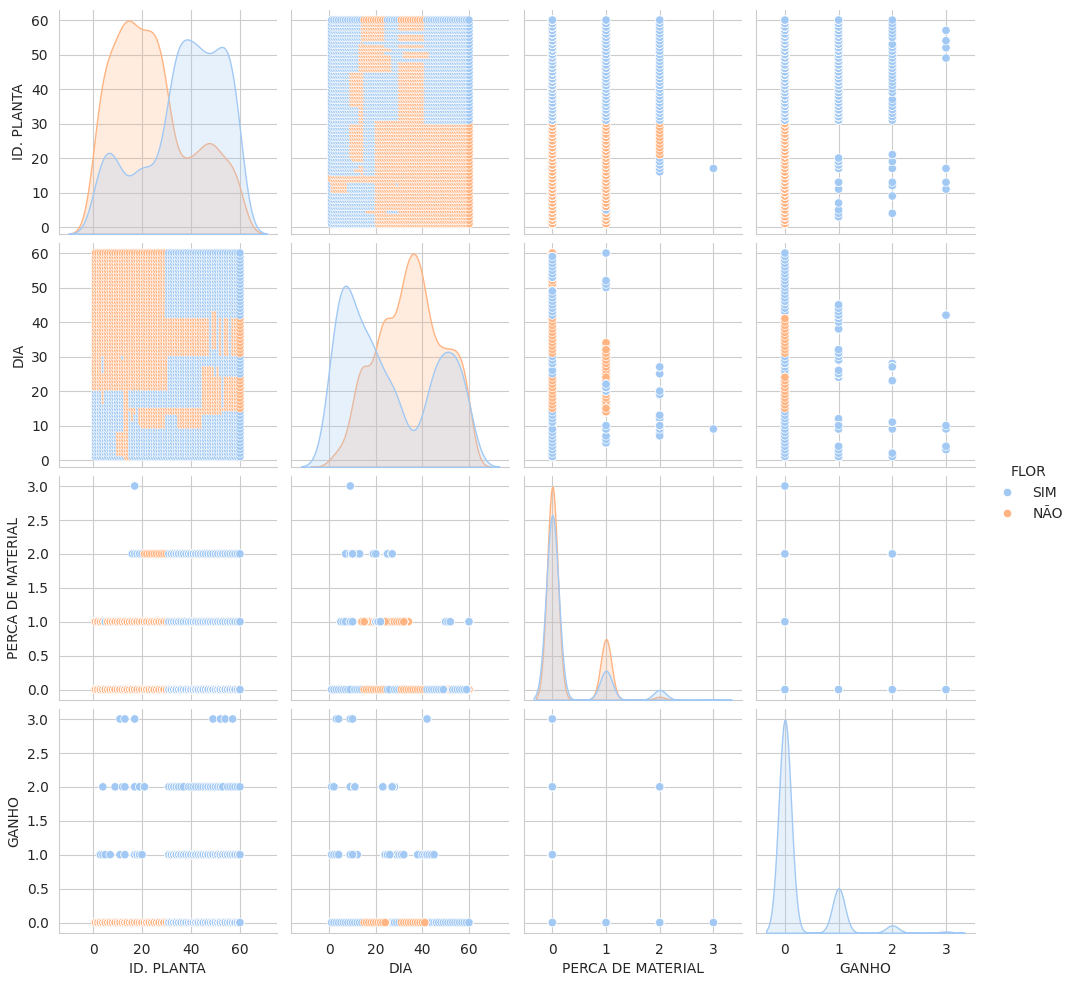

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=df, hue="FLOR", palette="pastel")

Nos gráficos podemos observar que há uma relativa distribuição equanime sobre a quantidade de flores (se houve ou não). Isso se deve ao fato de que boa parte do tempo houve uma maioria das plantas com flores, tendo variado a recuperação da floração conforme as condições expostas de cada conjunto de plantas. Aquelas que tiveram exposição total ao sol somada a uma adubação (ainda que em dobro da recomendada pelo fabricante) tiveram uma recuperação da floração posterior por isso no dia temos uma separação bem definida, ainda que contenham alguns intervalos de alguns com flores (caracterizando os outliers). 

In [5]:
df.isna().sum() / len(df)

ID. PLANTA           0.000000
DIA                  0.000000
CRESCIMENTO          0.000000
SOL                  0.000000
AGUA                 0.029167
FOLHA                0.000000
QUALIDADE            0.000000
DETALHE 1            0.000000
DETALHE 2            0.000000
ADUBO                0.000000
VIGOR                0.000000
COR                  0.000000
FLOR                 0.000000
QUALIDADE FLOR       0.000000
PERCA DE MATERIAL    0.000000
GANHO                0.000000
dtype: float64

Para o treinamento de modelos de machine learning, a decisão entre manter a numeração de 1 a 60 ou usar as datas reais depende do tipo de análise que você deseja realizar e do modelo que você vai usar.

- **Numeração (1 a 60)**: Se você está interessado apenas na progressão temporal como uma sequência de eventos, manter a numeração pode ser mais simples e direto. Modelos que não interpretam a data como um tipo de dado especial, mas apenas como uma sequência, podem se beneficiar dessa abordagem.

- **Datas Reais**: Se a temporalidade e a sazonalidade são importantes (por exemplo, se o crescimento das plantas é afetado por condições sazonais específicas), então usar as datas reais pode ser mais informativo. Modelos mais complexos que podem capturar padrões sazonais ou tendências ao longo do tempo podem se beneficiar de ter a data real.

Em geral, se a sazonalidade e a data específica não são importantes para a previsão da qualidade da flor, a numeração pode ser suficiente e mais prática. No entanto, se você acredita que a data exata pode fornecer insights adicionais para o modelo (como efeitos sazonais), então usar as datas reais pode ser a melhor escolha.

Lembre-se de que, ao usar datas, você deve convertê-las para um formato numérico que o modelo possa entender, como uma codificação de tempo cíclico ou uma transformação em timestamp.

In [6]:

# Criando a série de datas do período de observação
datas = pd.date_range(start='2023-11-06', end='2024-01-06')

# Supondo que 'df' é o seu DataFrame e 'DIA' é a coluna com os números de 1 a 60
df['DIA'] = df['DIA'].apply(lambda x: datas[x - 1])

# Agora a coluna 'DIA' terá as datas correspondentes em vez dos números
df.head()


,ID. PLANTA,DIA,CRESCIMENTO,SOL,AGUA,FOLHA,QUALIDADE,DETALHE 1,DETALHE 2,ADUBO,VIGOR,COR,FLOR,QUALIDADE FLOR,PERCA DE MATERIAL,GANHO
0,1,2023-11-06,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE,SIM,PERFEITA,0,0
1,1,2023-11-07,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
2,1,2023-11-08,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
3,1,2023-11-09,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,0,0
4,1,2023-11-10,SEM CRESCIMENTO,MEIO DIA DE SOL,40 ML,VERDE,PERFEITA,SEM DETALHE,SEM DETALHE,SEM ADUBO,TOTAL,VERDE CLARO,SIM,PERFEITA,1,0


In [7]:
df['AGUA'].unique()

array(['40 ML', '0 ML', '1 ML', '2 ML', '3 ML', '4 ML', '5 ML', nan],
      dtype=object)

Temos aqui na verdade dois valores. por uma equivoco no preenchimento dos dados, os valores de 1 a 5 são variações de 0 ML, ou seja, representa aqueles dias em que não teve agua. O outro valor seria os 40 ML que se manteve padrão em boa parte dos dias. 

Já que são somente dois valores: com e sem agua, vou normalizar entre 0 e 1, sendo o o 40 equiparado a 1 neste momento

In [8]:
df['AGUA'] = df['AGUA'].fillna('0')
df['AGUA'] = df['AGUA'].replace('0 ML', '0')
df['AGUA'] = df['AGUA'].replace('1 ML', '0')
df['AGUA'] = df['AGUA'].replace('2 ML', '0')
df['AGUA'] = df['AGUA'].replace('3 ML', '0')
df['AGUA'] = df['AGUA'].replace('4 ML', '0')
df['AGUA'] = df['AGUA'].replace('5 ML', '0')
df['AGUA'] = df['AGUA'].replace('40 ML', '1')



In [9]:
df.dtypes

ID. PLANTA                    int64
DIA                  datetime64[ns]
CRESCIMENTO                  object
SOL                          object
AGUA                         object
FOLHA                        object
QUALIDADE                    object
DETALHE 1                    object
DETALHE 2                    object
ADUBO                        object
VIGOR                        object
COR                          object
FLOR                         object
QUALIDADE FLOR               object
PERCA DE MATERIAL             int64
GANHO                         int64
dtype: object

In [10]:
df['AGUA'] = df['AGUA'].astype(int)

O que será feito aqui é aproveitar as colunas que tem somente duas variações:
- crescimento: com ou sem
- sol: pleno ou meio sol
- adubo: com ou sem
- flor: sim ou não

In [11]:
le = LabelEncoder()
colunas = ['CRESCIMENTO', 'SOL', 'ADUBO', 'FLOR']
for coluna in colunas:
    df[coluna] = le.fit_transform(df[coluna])


Agora vamos mapear os imperativos que não são com somente duas. 

A onda de luz é uma onda eletromagnética transversa (lado a lado), em que os campos  magnético e elétrico oscilam perpendicularmente à dire-  ção da propagação da onda e a um ângulo de 90o uma em  relação à outra.  A luz é também uma partícula, denominada fóton.  Cada fóton contém uma quantidade de energia que é chamada de quantum (plural: quanta). O conteúdo de energia da luz não é contínuo, mas emitido em “pacotes” discretos, os quanta. A energia (E) de um fóton depende da  frequência, de acordo com a relação conhecida como a lei  de Planck:  E = hν (7.2)  onde h é a constante de Planck (6,626 × 10–34 J s).  A luz solar é como uma chuva de fótons de diferentes frequências.

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 172). Edição do Kindle. 

A clorofila parece verde ao olho humano porque ela absorve luz principalmente nas porções vermelha e azul do espectro. Desse modo, apenas uma parte da luz enriquecida  nos comprimentos de onda do verde (cerca de 550 nm) é  refletida para o olho humano

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 173). Edição do Kindle. 

A absorção da luz é representada pela Equação 7.3, na  qual a clorofila (Chl) em seu estado mais baixo de energia,  ou estado de base, absorve um fóton (representado por hν)  e faz a transição para um estado de maior energia, ou estado excitado 

(Chl*):  Chl + hν → Chl* (7.3)  

A distribuição de elétrons na molécula excitada é,  de certa forma, diferente da distribuição na molécula em  estado-base (Figura 7.5). A absorção da luz azul excita a  clorofila a um estado energético mais elevado do que a absorção de luz vermelha, pois a energia dos fótons é maior  quando seus comprimentos de onda são mais curtos. No  estado de maior excitação, a clorofila é extremamente instável; ela rapidamente libera parte de sua energia ao meio  como calor, entrando em um estado de menor excitação,  no qual pode permanecer estável por um máximo de alguns nanossegundos (10–9 s). Devido à instabilidade inerente do estado excitado, qualquer processo que capture  sua energia deve ser extremamente rápido.  No estado de menor excitação, a clorofila

Taiz, Lincoln; Zeiger, Eduardo; Moller, Ian Max; Murphy, Angus. Fisiologia e Desenvolvimento Vegetal (p. 173). Edição do Kindle. 

Podemos dizer que o controle da luminosidade é umd os fatores que interfere na coloração da planta. Assim como a falta de nutrientes, a indicação de mudança no tom da folha indica alguma anormalidade do estado ideal de cada espécie vegetal. Para padronizar o teste: verde é o tom ideal, os demais apresentam algum desbalanceamento na iluminação ou na agua ou no solo. 

Verde escuro - foi notado um padrão de tonalidade mais escura para aquelas que não receberam sol pleno

Amarela - alem da questão da falta de sol, temos um padrão de falta de reequilibrio do solo por falta de adubo

Marrom - pela falta de exposição solar, pode indicar um excesso de agua, já que foi possivel notar mais no final dos dias de observação

Preta - estava morta

In [12]:
df['FOLHA'].unique()

array(['VERDE', 'VERDE ESCURO', 'AMARELA', 'MARROM', 'PRETA'],
      dtype=object)

In [13]:
df.loc[df['FOLHA'] == 'VERDE', 'FOLHA'] = 4
df.loc[df['FOLHA'] == 'VERDE ESCURO', 'FOLHA'] = 3
df.loc[df['FOLHA'] == 'AMARELA', 'FOLHA'] = 2
df.loc[df['FOLHA'] == 'MARROM', 'FOLHA'] = 1
df.loc[df['FOLHA'] == 'PRETA', 'FOLHA'] = 0

In [14]:
df['FOLHA'] = df['FOLHA'].astype(int)

A qualidade é um atributo vinculado ao estado da folha. 

In [15]:
df['QUALIDADE'].unique()

array(['PERFEITA', 'DIMINUICAO DA QUALIDADE', 'MORTA', 'MURCHA'],
      dtype=object)

In [16]:
# Dicionário para mapear as variáveis de qualidade para números
mapeamento_qualidade = {
    'MORTA': 0,
    'MURCHA': 1,
    'DIMINUICAO DA QUALIDADE': 2,
    'PERFEITA': 3
}

# Aplicando o mapeamento ao DataFrame
df['QUALIDADE'] = df['QUALIDADE'].map(mapeamento_qualidade)


O que temos na descrição dos detalhes, são complementos da coluna 'folha' e da coluna 'qualidade'. Por isso precisam ser consideradas como vinculadas. 

Detalhe 1 - caracteristicas gerais 
- 'SEM DETALHE': derivada da categoria perfeita, recebe a numeração mais alta
- 'PONTA QUEIMADA': é um pequeno detalhe que é comum de encontrar e interfere pouco no momento da venda
- 'MURCHANDO': já indica um problema maior na planta e representa em alguns casos motivos da falta de escolha da planta
- 'ENROLADA': já vem indicando uma falta de "vida" da planta, decorrente de um disturbio maior nas qualidades de cuidados da planta
- 'AMOLECENDO': ainda pode ter alguns poucos casos de recuperação da planta, mas não é uma boa condição
- 'ENRIJECENDO': aqui já temos um estado irrecuperavel da planta e dificilmente temos possibilidade de recuperação da mesma
- 'SEM FOLHA': totalmente irrecuperavel

Detalhe 2 - cores e uma segunda caracteristica para complentar o caso de planta com folhas pretas ou mortas

- 'SEM DETALHE': perfeita
- 'RECUPERAÇÃO DA COR': apesar do desequilíbrio, a planta está se recuperando
- 'AMARELAMENTO': aponta desequilíbrio sanável
- 'ESCURECENDO': estado depois de ter amarelado completamente, e partindo para um caminho sem volta de recuperação
- 'MOLE': algumas ainda tem cor, então ainda temos possiblidade de recuperacao 
- 'SEM FOLHA': sem recuperação
- 'ENRIJECENDO': aqui já temos um estado irrecuperavel da planta e dificilmente temos possibilidade de recuperação da mesma


In [17]:
df['DETALHE 1'].unique()


array(['SEM DETALHE', 'PONTA QUEIMADA', 'MURCHANDO', 'ENROLADA',
       'ENRIJECENDO ', 'SEM FOLHA', 'AMOLECENDO'], dtype=object)

In [18]:
df['DETALHE 2'].unique()

array(['SEM DETALHE', 'AMARELAMENTO', 'ESCURECENDO', 'ENRIJECENDO',
       'MOLE', 'SEM FOLHA', 'RECUPERAÇÃO DA COR'], dtype=object)

In [19]:
# Dicionários para mapear as categorias para números
mapeamento_categoria1 = {
    'SEM DETALHE': 6,
    'PONTA QUEIMADA': 5,
    'MURCHANDO': 4,
    'ENROLADA': 3,
    'AMOLECENDO': 2,
    'ENRIJECENDO': 1,
    'SEM FOLHA': 0
    # Adicione mais mapeamentos conforme necessário
}

mapeamento_categoria2 = {
    'SEM DETALHE': 6,
    'RECUPERAÇÃO DA COR': 5,
    'AMARELAMENTO': 4,
    'ESCURECENDO': 3,
    'MOLE': 2,
    'SEM FOLHA': 0,
    'ENRIJECENDO': 1
    # Adicione mais mapeamentos conforme necessário
}

# Aplicando o mapeamento ao DataFrame
df['DETALHE 1'] = df['DETALHE 1'].map(mapeamento_categoria1)
df['DETALHE 2'] = df['DETALHE 2'].map(mapeamento_categoria2)


In [20]:
df['VIGOR'].unique()

array(['TOTAL', 'ZERO', 'MEIO'], dtype=object)

In [21]:
# Dicionário para mapear as variáveis de qualidade para números
mapeamento_vigor = {
    'ZERO': 0,
    'MEIO': 1,
    'TOTAL': 2
}

# Aplicando o mapeamento ao DataFrame
df['VIGOR'] = df['VIGOR'].map(mapeamento_vigor)

In [22]:
df['COR'].unique()

array(['VERDE', 'VERDE CLARO', 'VERDE ESCURO', 'PRETA', 'MARROM',
       'AMARELO'], dtype=object)

Infelizmente a COR está repetindo uma qualidade tratada antes, que não mais faz sentido manter na base de dados, por isso está sendo retirada.

In [23]:
df.drop(columns=['COR'], inplace=True)

In [24]:
df['FLOR'].unique()

array([1, 0])

In [25]:
df['QUALIDADE FLOR'].unique()

array(['PERFEITA', 'DETALHES EM PÉTALAS', 'MURCHANDO', 'SEM FLOR',
       'BROTO NOVO'], dtype=object)

In [26]:
df.dtypes

ID. PLANTA                    int64
DIA                  datetime64[ns]
CRESCIMENTO                   int64
SOL                           int64
AGUA                          int64
FOLHA                         int64
QUALIDADE                     int64
DETALHE 1                   float64
DETALHE 2                     int64
ADUBO                         int64
VIGOR                         int64
FLOR                          int64
QUALIDADE FLOR               object
PERCA DE MATERIAL             int64
GANHO                         int64
dtype: object

In [27]:
df.isna().sum() / len(df)

ID. PLANTA           0.000
DIA                  0.000
CRESCIMENTO          0.000
SOL                  0.000
AGUA                 0.000
FOLHA                0.000
QUALIDADE            0.000
DETALHE 1            0.005
DETALHE 2            0.000
ADUBO                0.000
VIGOR                0.000
FLOR                 0.000
QUALIDADE FLOR       0.000
PERCA DE MATERIAL    0.000
GANHO                0.000
dtype: float64

In [28]:
df['QUALIDADE'].interpolate(method='spline', order=2, inplace=True)
df['DETALHE 1'].interpolate(method='spline', order=2, inplace=True)


/var/folders/zr/b_1zfxq142x_rwyp0glmf6400000gn/T/ipykernel_17225/3550408603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['QUALIDADE'].interpolate(method='spline', order=2, inplace=True)
/var/folders/zr/b_1zfxq142x_rwyp0glmf6400000gn/T/ipykernel_17225/3550408603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [29]:
df.isna().sum() / len(df)

ID. PLANTA           0.0
DIA                  0.0
CRESCIMENTO          0.0
SOL                  0.0
AGUA                 0.0
FOLHA                0.0
QUALIDADE            0.0
DETALHE 1            0.0
DETALHE 2            0.0
ADUBO                0.0
VIGOR                0.0
FLOR                 0.0
QUALIDADE FLOR       0.0
PERCA DE MATERIAL    0.0
GANHO                0.0
dtype: float64

## Porque escolher a arvore de decisão?
Muito emora possa ser dificil imaginar espsecialistas de outras áreas estudando o aprendizado de máquina, temos alguns estudos direcionando para essa junção feita não somente com a juncão de profissionais que utilizam dos servicos de cientistas de dados para responder alguma duvida. 

Na área da saude, temos profissionais que querem saber entender pefeitamente o resultado obtido e alem disso recohecem a importancia do aprendizado de máquina considerando os seguintes pontos:

 - D: dados
 - O: otimização
 - M: modelo
 - Avaliação

o DOME é importando para os estudos voltados para a biologia, principalmente no que se refere ao modelo e a avaliação: 

Modelo:
É importante especificar se o modelo gera uma classificação (por exemplo, previsões binárias) ou regressão (por exemplo, pontuação de probabilidade).
Deve-se fornecer o tempo de CPU de uma execução representativa em hardware padrão (por exemplo, segundos em um PC desktop).
A disponibilidade do código-fonte, como um repositório no GitHub, contêiner de software, URL do site e licença, deve ser clara.
A interpretabilidade do modelo é crucial e deve ser considerada para cada modelo treinado.


Avaliação:
O método de avaliação deve ser transparente, incluindo divisões de conjuntos de dados, tamanho e distribuição de dados positivos e negativos nos conjuntos de treinamento, validação (se houver) e teste.
A disponibilidade de metaprevisões e a clareza sobre como outros métodos são usados e se os conjuntos de dados são claramente independentes são essenciais.
A codificação dos dados, o número de parâmetros do modelo de ML e o número de características de entrada de ML devem ser claramente definidos.
Justificativas para a seleção de características e a exclusão de sobreajuste ou subajuste são necessárias.
As medidas de desempenho devem incluir comparações e intervalos de confiança, além de justificativas para alegar diferenças de desempenho.

É claro que imaginanos um cientista de dados, qualquer modelo de aprendizado de máquina já apresenta um clareza e transparencia maior do que para qualquer outro profisisonal estranho à área. Por isso temos um destaque maior para a arvore de decisao que temos uma interpretabilidade maior para aqueles que desejam confirmar uma linha de confirmação através de uma previsão binária. Essa interpretabilidade torna o resultado mais confiável, o que torna o modelo de arvore de decisao como tranparente; em contrapartida dos modelos de redes neurais que sao considerados como caixa-preta

Árvores de Decisão:

São consideradas modelos transparentes porque as decisões tomadas por uma árvore de decisão podem ser facilmente interpretadas e visualizadas.
Cada decisão ou divisão na árvore é clara e baseada em regras lógicas que podem ser seguidas passo a passo.
Isso é particularmente útil em áreas como design de drogas e diagnósticos, onde entender as relações causais é crucial.

Redes Neurais:

Por outro lado, as redes neurais são muitas vezes vistas como caixas-pretas porque é difícil entender exatamente como elas chegam a uma determinada previsão ou classificação.
Elas consistem em muitas camadas e uma grande quantidade de parâmetros, o que torna a interpretação dos processos internos complexa.
No entanto, isso não significa que sejam ineficazes; em certos contextos, como reconhecimento de imagens, elas podem ser muito eficientes.
O artigo sugere que, apesar do interesse crescente em explicar modelos de caixa-preta, uma perspectiva recente propôs permitir a transparência empregando modelos interpretáveis desde o início. Dependendo do valor do resultado, modelos de caixa-preta podem ajudar a remover fatores subjetivos de decisões controversas e oferecer o potencial para inspirar e guiar a investigação humana.

https://www.turing.com/kb/random-forest-algorithm

In [30]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Supondo que 'df' é o seu DataFrame original
df_randomf = df.copy()  # Crie uma cópia do DataFrame original

# Convertendo a coluna de datas para timestamp UNIX (em segundos)
df_randomf['DIA'] = df_randomf['DIA'].apply(lambda x: x.timestamp())

#Definindo X e y
X_randomf = df_randomf.drop(columns=['QUALIDADE FLOR'])  # Variáveis independentes
y_randomf = df_randomf['QUALIDADE FLOR']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_randomf, y_randomf, test_size=0.2, random_state=42)

# Criando o modelo de classificação
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões e avaliando o modelo
y_pred = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, y_pred)}')


Acurácia do modelo: 0.9888888888888889


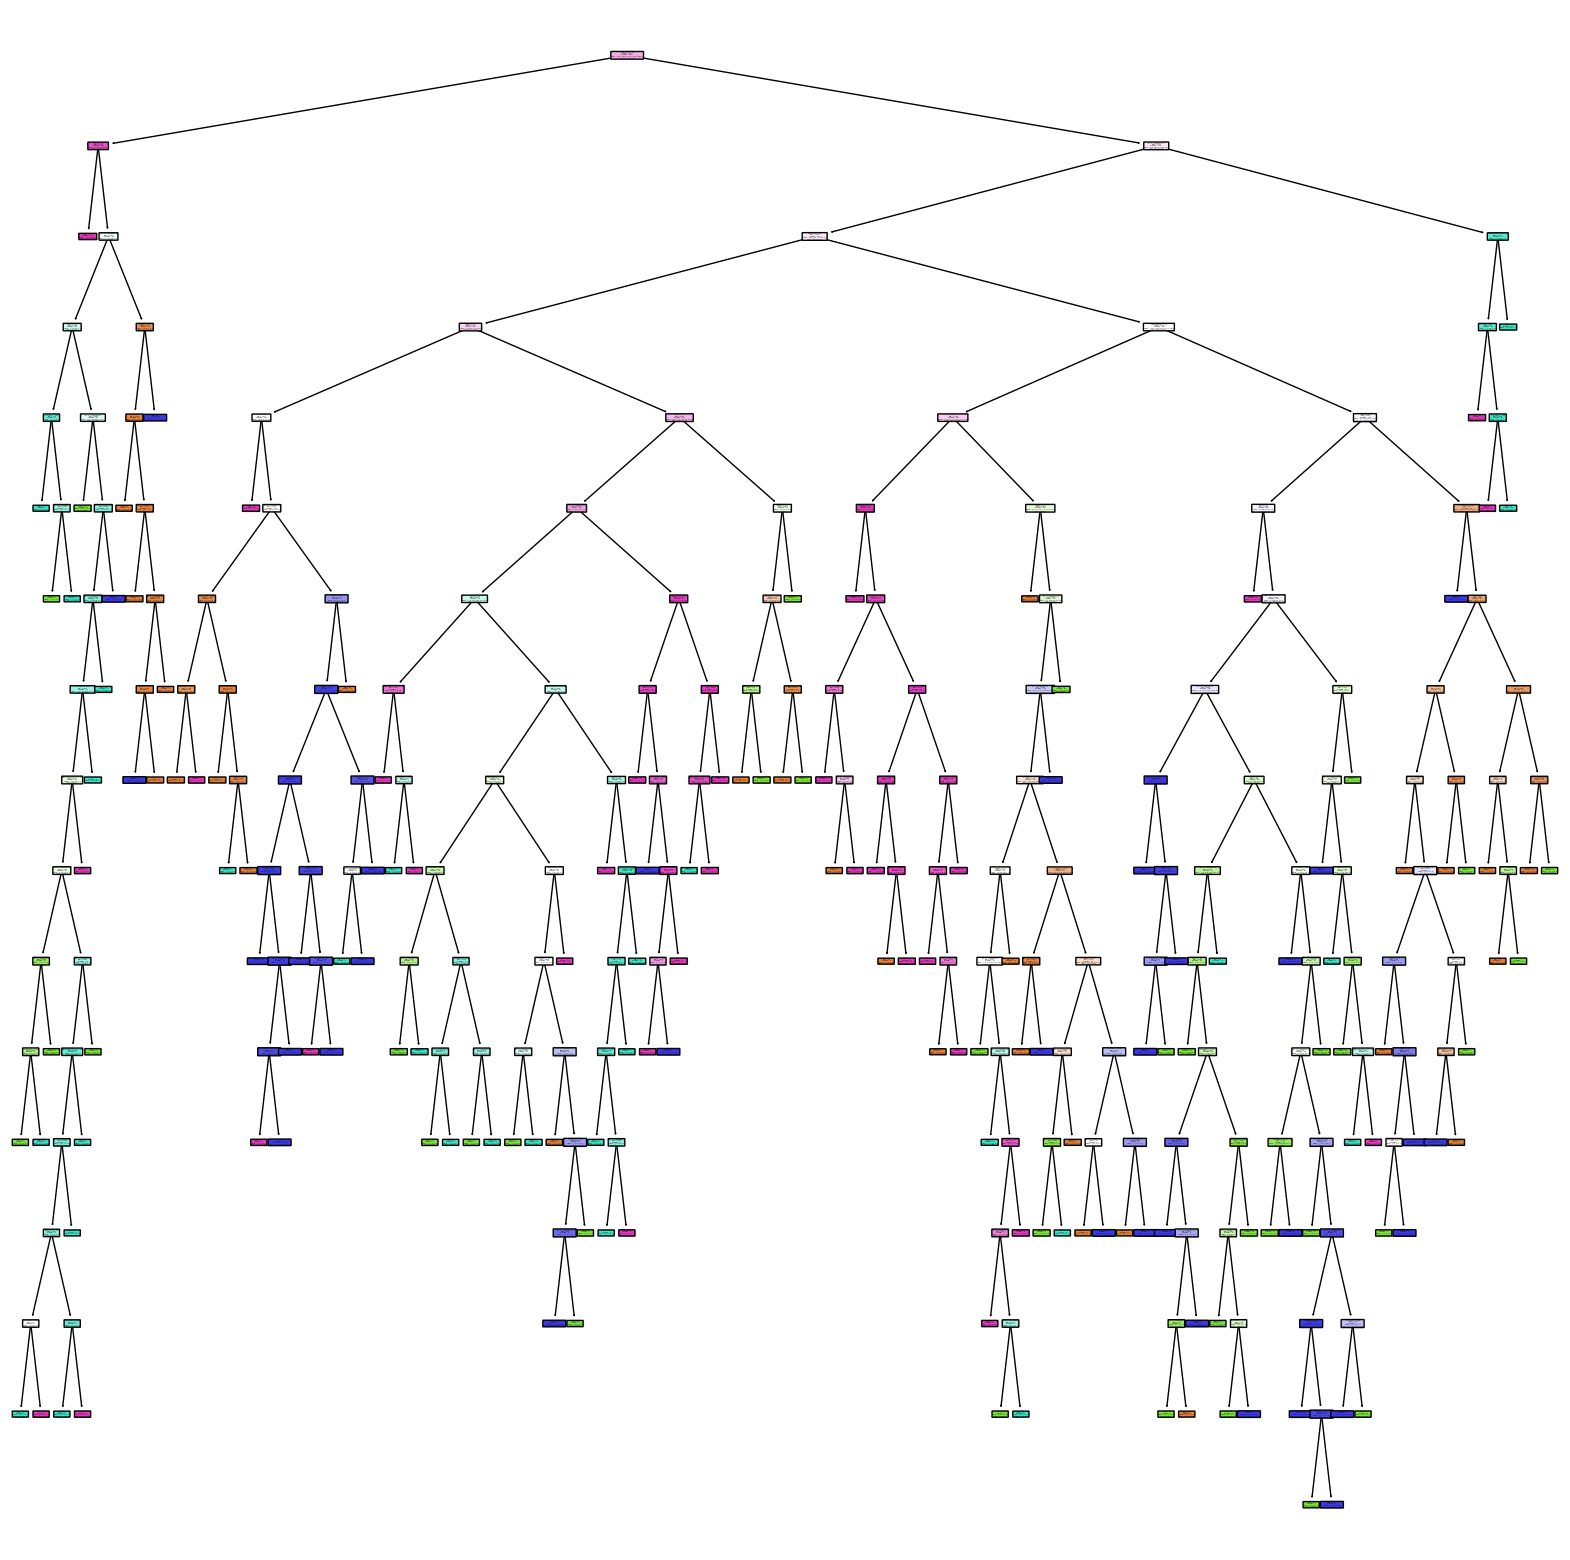

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Supondo que 'modelo' é o seu modelo de floresta aleatória treinado
estimador = modelo.estimators_[0]

# Visualizando a árvore com plot_tree
plt.figure(figsize=(20, 20))
plot_tree(estimador, 
          feature_names=X_train.columns, 
          class_names=[str(cls) for cls in y_train.unique()],
          filled=True, rounded=True)
plt.show()


#### Motivação para o Uso de RNNs
Redes Neurais Recorrentes (RNNs) são uma classe de redes neurais especialmente adequadas para trabalhar com dados sequenciais. Diferente das redes neurais tradicionais, que assumem independência entre as entradas, as RNNs conseguem capturar dependências temporais ao manter um estado interno que é atualizado a cada passo temporal.

Essa assunção de independencia é condicional, entre as variáveis de entrada e saida. ou seja: dado o valor de uma variável de entrada, a saude não depende das outras variáveis de entrada.  A independência condicional é uma simplificação útil para redes neurais feedforward, mas não se aplica diretamente às variáveis de treinamento. Durante o treinamento, as redes aprendem a capturar as relações complexas entre as entradas e saídas, independentemente dessa suposição


#### Aplicações Comuns de RNNs
- **Processamento de Linguagem Natural (PLN)**:
  - **Tradução Automática**: Traduzir textos de um idioma para outro, onde o contexto das palavras anteriores influencia a tradução das palavras seguintes.
  - **Análise de Sentimento**: Determinar o sentimento (positivo, negativo, neutro) de um texto, onde o significado de uma palavra pode depender de palavras anteriores.
  - **Modelagem de Linguagem**: Prever a próxima palavra em uma sequência de palavras, útil em autocompletar e geração de texto.

- **Séries Temporais**:
  - **Previsão de Demanda**: Prever a demanda futura de produtos ou serviços com base em dados históricos.
  - **Análise Financeira**: Analisar dados financeiros como preços de ações para prever tendências futuras.
  - **Monitoramento de Sensores**: Analisar dados de sensores ao longo do tempo para detectar anomalias ou prever falhas.

- **Reconhecimento de Fala**:
  - **Transcrição de Áudio para Texto**: Converter fala em texto, onde o contexto temporal das palavras é essencial para a precisão da transcrição.
  - **Comandos de Voz**: Reconhecer e interpretar comandos de voz, onde a sequência de palavras pode alterar o significado do comando.

- **Gerenciamento de Diálogos**:
  - **Chatbots e Assistentes Virtuais**: Manter o contexto de uma conversa para fornecer respostas mais coerentes e relevantes.

RNNs são uma ferramenta poderosa para qualquer tarefa onde a ordem dos dados importa. Sendo particularmente adequadas para análise de séries temporais e podem ser usadas para identificar padrões e tendências que informam decisões de negócios, como a melhor data para realizar vendas ou aplicar promoções de produtos:

1. Análise de Tendências:
- As RNNs podem analisar dados históricos de vendas para identificar tendências e padrões.
- Elas podem aprender quais dias da semana, épocas do ano ou eventos específicos geralmente resultam em maiores vendas.
2. Previsão de Demanda:
- As RNNs podem prever a demanda futura de um produto com base em dados passados.
- Isso ajuda a otimizar o estoque e a planejar promoções quando a demanda prevista é alta.
3. Otimização de Preços:
- As RNNs podem ser treinadas para sugerir ajustes de preços dinâmicos que maximizem a receita, considerando fatores como demanda, concorrência e custos.
4. Personalização de Promoções:
- As RNNs podem ajudar a personalizar promoções para diferentes segmentos de clientes, baseando-se em seus padrões de compra anteriores.
5. Detecção de Anomalias:
- As RNNs podem detectar dias atípicos onde o comportamento de compra desvia significativamente do padrão, o que pode indicar oportunidades ou problemas.

Para implementar um sistema baseado em RNN para esses fins, seria necessário coletar e preparar dados históricos de vendas, incluindo informações sobre promoções anteriores, feriados, eventos locais e outros fatores que podem influenciar as vendas. Depois, um modelo de RNN seria treinado com esses dados para aprender a prever as vendas futuras e identificar os melhores momentos para promoções.

É importante notar que, embora as RNNs sejam poderosas, elas são apenas uma ferramenta entre muitas no campo da análise de dados. Outros métodos e modelos também podem ser considerados, dependendo da complexidade e natureza dos dados disponíveis.

Sem um histórico de vendas ou informações sobre promoções anteriores, a otimização de preços e a personalização de promoções podem ser mais desafiadoras, mas ainda é possível explorar outras abordagens. Vou apresentar algumas alternativas:

1. Abordagem Baseada em Dados Disponíveis:
- Mesmo sem um histórico específico de vendas, você pode usar dados disponíveis para tomar decisões informadas.
- Considere dados como:
    - Dados Demográficos: Informações sobre seus clientes, como idade, localização, preferências, etc.
    - Dados de Produtos: Informações sobre os produtos que você vende, como categorias, características, etc.
    - Dados de Temporada: Informações sobre épocas do ano, feriados, eventos sazonais, etc.
- Com base nesses dados, você pode ajustar preços e promoções de forma mais geral.
2. Modelos de Aprendizado de Máquina Alternativos:
- Embora as RNNs sejam poderosas para séries temporais, outros modelos de aprendizado de máquina podem ser aplicados.
- Árvores de Decisão, Florestas Aleatórias, Regressão Linear, Regressão Logística e Métodos Ensemble podem ser usados para prever demanda e otimizar preços.
- Esses modelos não dependem estritamente de séries temporais.
3. Abordagem Heurística:
- Use regras heurísticas ou conhecimento especializado para tomar decisões.
- Por exemplo, se você sabe que o Natal é uma época de alta demanda, pode aplicar promoções nessa época.
4. Testes A/B e Experimentação:
- Execute testes A/B com diferentes preços e promoções para avaliar o impacto.
- Isso permite que você aprenda com os dados gerados durante os testes.
5. Feedback dos Clientes:
- Colete feedback dos clientes sobre preços e promoções.
- Isso pode ajudar a ajustar suas estratégias com base nas percepções dos clientes.

é possível usar uma Rede Neural Recorrente (RNN) para determinar os melhores dias de venda com base nas notas qualitativas de uma planta! Vou explicar como você pode abordar essa tarefa:

1. Preparação dos Dados:
- Primeiro, organize seus dados. Você mencionou que tem colunas com notas para diferentes aspectos da planta (folha, flor, vigor, etc.).
- Cada linha representa um dia de observação, e as notas variam de 1 a 5.
2. Representação Sequencial:
- Converta suas notas em uma sequência temporal.
- Por exemplo, se você tiver 30 dias de observações, crie uma sequência de 30 valores, onde cada valor representa a nota para aquele dia.
3. Modelo de RNN:
- Crie um modelo de RNN para prever a qualidade da planta com base nas notas anteriores.
- Você pode usar uma RNN simples, uma Long Short-Term Memory (LSTM) ou uma Gated Recurrent Unit (GRU).
- A entrada da RNN será a sequência de notas anteriores, e a saída será a previsão para o próximo dia.
4. Treinamento e Validação:
- Divida seus dados em conjuntos de treinamento e validação.
- Treine o modelo usando as notas anteriores como entrada e a nota subsequente como saída.
- Ajuste os hiperparâmetros (como o tamanho da janela de sequência, o número de camadas, etc.).
5. Previsões Futuras:
- Após treinar o modelo, use-o para fazer previsões futuras.
- Dado um conjunto de notas anteriores, o modelo prevê a próxima nota.
- Com base nessas previsões, você pode identificar os dias em que a planta provavelmente terá melhor qualidade.
6. Otimização de Preços e Promoções:
- Combine as previsões de qualidade da planta com informações sobre demanda, estoque e outros fatores.
- Use essas informações para otimizar os preços e aplicar promoções nos dias em que a qualidade da planta é esperada para ser alta.

Lembre-se de que a qualidade da planta pode ser influenciada por muitos outros fatores além das notas (como condições climáticas, fertilização, etc.). Portanto, considere esses fatores também ao tomar decisões de negócios. 

### Sobre o uso das RNN e outras redes em estudos de plantas

1. A Novel Approach for Plant Leaf Disease Predictions Using Recurrent Neural Network RNN Classification Method

A ideia primordial aqui seria a utilização de aprendizado de máquina voltado para detecção de doenças nas folhas, que ocorrem de maneira recorrente nas plantações. 

Esse ideal tambem poderia ter sido utlizado aqui caso contivesse um banco maior de imagem das folhas das plantas observadas. Contudo, devido as condições de desenvolvimento não seria possivel obter um banco de imagens suficintes para o desenvolvimento desse aprendizado de máquina de maneira eficiente, de modo que: 
-  seria necessário uma quantidade muito maior de espécimes de observação
-  alteranativamente poderia ser utilizado algum banco de dados de imagens da planta em questão, disponibilizado em algum site confiável como o kaggle ou dados governamentais
- haveria a necessidade de um tempo maior de observação das plantas para a coleta de um banco de imagens extenso o suficiente para o estudo e desenvolvimento do aprendizado de máquina voltado para esse fim

Muito embora não seja possivel o desenvolvimento e aplicação do aprendizado de máquina para este fim, ainda sim vale a observação sobre o modo de desenvolvimento do trabalho acima citado para esclarecimento de possiblidade de adequação do método usado neste trabalho e como há mais de um caminho a ser adotado e em outras oportunidades desenvolvido e aprimorado. 

Através de uma base de dados obtida pelo Kaggle, foi proposta uma combinação de CNN com LSTM para aprimorar de maneira bem sucessida, diga-se de passagem, na precião da identificação de doenças em plantas, em comparação a outros métodos.

Em ambiente controlado, pelas caracteristicas de desenvolvimento das sunpatiens, não foi identificado nenhuma anomalia relacionada a doenças. Apenas a alteração nos fatores de exposição das plantas ao sol, adubo e agua. Isso mostrou no banco de dados aqui tratado, resultados que, ainda que não sejam aplicados o deep learning, podem ser facilmente interpretados pelo comerciante de plantas. De certa maneira, poderia ser um algoritmo voltado mais para a destinação do consumidor final do que do lojista em si. 

Redes Neurais Convolucionais (CNNs) para Extração de Recursos de Imagens:
As CNNs são redes neurais profundas projetadas para processar imagens.
Elas extraem recursos (como bordas horizontais, verticais, valores RGB etc.) das imagens.
As CNNs são ideais para a extração de funções visuais.
Ativação da Função:
A fórmula da função de ativação é:

Aqui, f(x) é a função de ativação, g é uma representação gráfica das imagens.
Classificação Usando RNNs:
As RNNs de classificação são criadas com pequenas quantidades de dados existentes.
Elas são ajustadas com parâmetros de redes já treinadas em grandes conjuntos de dados.
Neste caso, as RNNs são usadas para prever doenças em folhas de plantas.
Conjunto de Dados do Plant Village:
O conjunto de dados do Plant Village contém cerca de 20.000 imagens de plantas saudáveis e doentes, com 38 classes já rotuladas.
As imagens são categorizadas em classes como “saudável”, “doença precoce”, “doença intermediária” e “doença avançada”.
O estudo utiliza CNN para extração de recursos e RNN para classificação.
Resultados:
O sistema de detecção automática de doenças em folhas de plantas alcançou uma precisão de mais de 95% nas imagens do conjunto de dados.
O estudo comparou o desempenho da previsão de doenças usando diferentes classificadores, incluindo LSTM, e obteve uma precisão geral de 98%.
Em resumo, o estudo demonstra a eficácia do uso de CNNs e RNNs para detectar doenças em folhas de plantas, com foco na precisão e aplicação prática



2. Evaluating Time-Series Prediction of Temperature, Relative Humidity, and CO2 in the Greenhouse with Transformer-Based and RNN-Based Models
A ideia aqui neste arigo foi utilizar o aprendizado de máquina para analisar o quão preciso poderia ser o codigo e o proprio aprendizado em relação a medição de temperatura, humidade relativa, CO2, diante de duas variações de modelo que seriam a LSTM e SegRN. Ao final desse estudo foram obtidos ótimos resulados de precisao e antecipação.

Em que pese a precisão obtida nos resutlados, inclusive com capacidade de antecipação de 10 a 20 minutos, na descrição dos métodos foram utilizadas bons equipamentos de medição apra forneceimento de uma base de dados extensa e precisa. Equipamentos estes que não foram possiveis acessar no estudo deste trabalho por duas razões: não houve tempo hábil para o forncecimento deste equipameto pela equipe da faculdade e tambem, mesmo que houvesse esse fornecimento, para fins praticos, poucos comerciantes teriam acesso ao equipamento para a previsão e confirmação de resultados. 

Para melhor resultado foi desenvolvido um aprendizado baseado em SegRNN, que segundo palavras dos pesquisadores, o aprimoramento deste modelo frente ao RNN, lidou melhor com problemas de janelas de retrospectiva de dados: "Apesar de seu uso generalizado, os modelos baseados em RNN ficaram para trás em relação aos modelos baseados em transformadores em termos de desempenho de previsão para dados de séries temporais. No entanto, pesquisas recentes revelaram que o SegRNN, uma versão aprimorada do RNN convencional, alcança um desempenho notável na previsão de séries temporais. RNNs convencionais normalmente enfrentam problemas de desempenho devido a janelas de retrospectiva excessivamente longas e horizontes de previsão. O SegRNN aborda isso reduzindo o número de iterações por meio de iteração segmentada e previsão multietapa paralela, o que pode melhorar o desempenho da previsão para séries temporais".

Mas é um resumo dos resultados obtidos de forma que é melhor explicado pela observação dos resultados. Pois, embora os pesquisadores afirme a superioridade do modelo baseado em SegRNN, há na verdade ganhos e perdas relativas aos de RNN. já que de forma geral, o modelo linear simples, DLinear, superou consistentemente os outros na maioria das métricas para previsões após 1 hora e 3 horas. O modelo baseado em RNN, SegRNN, mostrou um desempenho quase similar, mas ligeiramente inferior ao DLinear. Análises visuais detalhadas dos valores reais e previstos pelos modelos Autoformer, DLinear, LSTM e SegRNN sugerem que o DLinear e o SegRNN geralmente exibiram um melhor desempenho de previsão em comparação com os outros modelos. Para temperatura, tanto o DLinear quanto o SegRNN mostraram previsões razoáveis. Para RH, o LSTM mostrou uma curva de previsão consideravelmente diferente dos outros três modelos e teve o pior desempenho de todos. Em termos de concentração de CO2, o SegRNN pareceu exibir o melhor desempenho, correspondendo de perto aos valores reais.

3. Prediction of Wastewater Treatment Plant Effluent Water
Quality Using Recurrent Neural Network (RNN) Models

Os modelos de Redes Neurais Recorrentes (RNNs) são excelentes para desenvolver um modelo preditivo para dados sequenciais em estações de tratamento de águas residuais (WWTPs). Neste estudo, foram utilizados modelos RNN simples e LSTM para avaliar o desempenho na previsão de parâmetros de efluentes com diferentes tamanhos de dados, épocas e tamanhos de lote.

Os resultados mostram que os dados históricos de 2015 a 2018, com épocas de 50 e tamanhos de lote de 100, são a arquitetura de modelo ideal, resultando no menor valor de RMSE entre 0,3 e 0,8 e menor tempo de treinamento. O modelo de previsão foi desenvolvido em cinco etapas: definição, compilação, ajuste e avaliação da rede, seguido pela previsão. Os resultados previstos foram precisos, com baixos valores de RMSE e MAE em comparação com o intervalo de dados original, enquanto o R2 ficou próximo de um.

Tanto os valores de RMSE quanto os de MAE foram semelhantes para os modelos RNN simples e LSTM nas previsões de BOD5, TP, TSS e NH3-N. Para a previsão de TKN, o LSTM alcançou uma precisão maior de 0,067, enquanto o modelo RNN simples teve um RMSE de 0,091 devido à alta variação dos dados. Assim, o modelo LSTM obteve melhores resultados para valores variáveis.

Em resumo, os modelos RNN simples e LSTM propostos neste estudo são robustos e podem ser usados para prever a qualidade da água de efluentes em WWTPs. Além disso, a aplicação de um modelo de otimização em tempo real pode permitir a previsão da qualidade do efluente para alguns dias, selecionando automaticamente a arquitetura de modelo mais adequada, incluindo época, tamanho de lote e até mesmo o conjunto de dados. Esse desenvolvimento de modelo auxiliará as WWTPs na operação e otimização de processos.

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
df.head()

,ID. PLANTA,DIA,CRESCIMENTO,SOL,AGUA,FOLHA,QUALIDADE,DETALHE 1,DETALHE 2,ADUBO,VIGOR,FLOR,QUALIDADE FLOR,PERCA DE MATERIAL,GANHO
0,1,2023-11-06,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
1,1,2023-11-07,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
2,1,2023-11-08,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
3,1,2023-11-09,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
4,1,2023-11-10,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,1,0


In [67]:
df_LNN = df.drop('DIA', axis= 1)

A função `create_dataset` é usada para preparar os dados de entrada de modo a incluir essas sequências históricas (lookback) para treinar modelos de aprendizado de máquina ou deep learning.

Ela vai receber um conjunto de dados e um parâmetro `time_step` que define o tamanho da janela de tempo (lookback) usada para criar as sequências históricas (60 dias no caso). A função retorna duas arrays: uma contendo as sequências de entrada (`X`) e outra contendo os valores alvo correspondentes (`Y`).

### Passo a Passo da Função

1. **Inicialização**:
    - A função inicializa duas listas vazias, `X` e `Y`, para armazenar as sequências de entrada e os valores alvo, respectivamente.

2. **Loop sobre os dados**:
    - A função percorre o conjunto de dados usando um loop. Para cada posição no conjunto de dados:
        - **Sequência de entrada (`X`)**: A função coleta uma sequência de `time_step` valores e a adiciona à lista `X`.
        - **Valor alvo (`Y`)**: O valor de `Close` imediatamente após a sequência é adicionado à lista `Y`. Este é o valor que o modelo tentará prever.

3. **Conversão para arrays NumPy**:
    - Após a coleta de todas as sequências e valores alvo, as listas `X` e `Y` são convertidas para arrays NumPy para facilitar o uso em modelos de aprendizado de máquina.


In [68]:
df_LNN.head()

,ID. PLANTA,CRESCIMENTO,SOL,AGUA,FOLHA,QUALIDADE,DETALHE 1,DETALHE 2,ADUBO,VIGOR,FLOR,QUALIDADE FLOR,PERCA DE MATERIAL,GANHO
0,1,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
1,1,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
2,1,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
3,1,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,0,0
4,1,1,0,1,4,3,6.0,6,1,2,1,PERFEITA,1,0


In [69]:
# Preparando para uso da função:
# 'df_LNN' é o seu dataframe e vou usar 'time_step' de 60 dias.
# A coluna 'QUALIDADE FLOR' tem que a última coluna do seu dataframe, já que será utilizada como determinante para os dias de venda.
df_LNN = df_LNN[['ID. PLANTA', 'CRESCIMENTO', 'SOL', 'AGUA', 'FOLHA', 'QUALIDADE', 'DETALHE 1', 'DETALHE 2', 'ADUBO', 'VIGOR', 'FLOR', 'PERCA DE MATERIAL', 'GANHO', 'QUALIDADE FLOR']]
df_LNN.dtypes

ID. PLANTA             int64
CRESCIMENTO            int64
SOL                    int64
AGUA                   int64
FOLHA                  int64
QUALIDADE              int64
DETALHE 1            float64
DETALHE 2              int64
ADUBO                  int64
VIGOR                  int64
FLOR                   int64
PERCA DE MATERIAL      int64
GANHO                  int64
QUALIDADE FLOR        object
dtype: object

In [70]:
df_LNN['QUALIDADE FLOR'].unique()

array(['PERFEITA', 'DETALHES EM PÉTALAS', 'MURCHANDO', 'SEM FLOR',
       'BROTO NOVO'], dtype=object)

In [71]:
# Dicionário para mapear as variáveis de qualidade para números
mapeamento_qualidade_flor= {
    'PERFEITA': 4,
    'BROTO NOVO': 3,
    'DETALHES EM PÉTALAS': 2,
    'MURCHANDO': 1,
    'SEM FLOR': 0
}

# Aplicando o mapeamento ao DataFrame
df_LNN['QUALIDADE FLOR'] = df_LNN['QUALIDADE FLOR'].map(mapeamento_qualidade_flor)

In [72]:
df_LNN.dtypes

ID. PLANTA             int64
CRESCIMENTO            int64
SOL                    int64
AGUA                   int64
FOLHA                  int64
QUALIDADE              int64
DETALHE 1            float64
DETALHE 2              int64
ADUBO                  int64
VIGOR                  int64
FLOR                   int64
PERCA DE MATERIAL      int64
GANHO                  int64
QUALIDADE FLOR         int64
dtype: object

A conversão dos dados para float32 antes de aplicar o MinMaxScaler é recomendada por algumas razões:

Compatibilidade com o Scaler: O MinMaxScaler e outros scalers do sklearn esperam dados em ponto flutuante, pois eles realizam operações aritméticas que podem não ser bem definidas para inteiros, como divisão por um intervalo que pode ser um número decimal.

Precisão dos Cálculos: A conversão para float32 garante que a precisão dos cálculos seja mantida durante a normalização. Os números inteiros não podem representar frações, o que pode ser necessário ao normalizar os dados.

Requisitos do Modelo: Muitos modelos de aprendizado de máquina, incluindo redes neurais, funcionam melhor com dados em ponto flutuante devido à natureza dos cálculos envolvidos, como gradientes e ajustes de pesos que são valores contínuos e não discretos.

Eficiência de Memória: float32 é uma escolha eficiente em termos de memória para representar números decimais em comparação com float64, sem perder muita precisão para a maioria das tarefas de aprendizado de máquina.

In [73]:
# Convertendo o dataframe para uma array NumPy
df_LNN = df_LNN.astype('float32')


In [74]:
def create_dataset(df_LNN, time_step):
    X, y = [], []
    # Loop para criar sequências de entrada e os valores alvo correspondentes
    for i in range(len(df_LNN) - time_step):
        # Adicionando a sequência de 'time_step' valores à lista X
        X.append(df_LNN.iloc[i:(i + time_step)].values)
        # Adicionando o valor alvo após a sequência à lista Y
        y.append(df_LNN.iloc[i + time_step, -1])  # Supondo que 'QUALIDADE FLOR' seja a última coluna
    # Convertendo as listas X e Y para arrays numpy
    return np.array(X), np.array(y)

# Criando o dataset
time_step = 60
X, Y = create_dataset(df_LNN, time_step)

# Agora 'X' e 'Y' estão prontos para serem usados no treinamento do modelo.


In [76]:
# Dividindo os dados em conjuntos de treino e teste 
X_train = X[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]

y_train = Y[:int(len(Y) * 0.8)]
y_test = Y[int(len(Y) * 0.8):]

In [77]:
# Normalizando os dados de treinamento
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [78]:
# Normalizando os dados de teste
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [79]:
# Definindo a arquitetura do modelo RNN
model = Sequential()

# Adicionando uma camada RNN com 50 unidades e ativação tanh
# Esta camada processa a sequência de entrada e mantém um estado interno para capturar dependências temporais
# return_sequences=True garante que todas as saídas da sequência sejam retornadas, não apenas o último estado
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adicionando uma camada Dropout com taxa de 0.2 para evitar overfitting
# Dropout ajuda a regularizar o modelo desligando aleatoriamente uma fração das unidades durante o treinamento
model.add(Dropout(0.2))

# Adicionando uma segunda camada RNN com 50 unidades e ativação tanh
# Adiciona capacidade extra ao modelo para aprender padrões mais complexos nas sequências de entrada
# Esta camada não precisa de return_sequences=True, pois é a última camada RNN antes da camada densa
model.add(SimpleRNN(units=50, activation='tanh'))

# Adicionando uma segunda camada Dropout com taxa de 0.2 para regularização adicional
model.add(Dropout(0.2))

# Adicionando uma camada densa (fully connected) com 1 unidade
# Esta camada gera a previsão final do modelo
model.add(Dense(units=1))

# Compilando o modelo com otimizador adam e função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo a arquitetura do modelo
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,351 (32.62 KB)

 Trainable params: 8,351 (32.62 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Treinando a RNN
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
80/80 - 5s - 58ms/step - loss: 0.2704 - val_loss: 0.0720
Epoch 2/100
80/80 - 1s - 16ms/step - loss: 0.1590 - val_loss: 0.0585
Epoch 3/100
80/80 - 2s - 20ms/step - loss: 0.1101 - val_loss: 0.0412
Epoch 4/100
80/80 - 2s - 19ms/step - loss: 0.0866 - val_loss: 0.0349
Epoch 5/100
80/80 - 1s - 17ms/step - loss: 0.0676 - val_loss: 0.0320
Epoch 6/100
80/80 - 1s - 18ms/step - loss: 0.0619 - val_loss: 0.0338
Epoch 7/100
80/80 - 1s - 16ms/step - loss: 0.0529 - val_loss: 0.0308
Epoch 8/100
80/80 - 1s - 19ms/step - loss: 0.0486 - val_loss: 0.0341
Epoch 9/100
80/80 - 2s - 20ms/step - loss: 0.0413 - val_loss: 0.0305
Epoch 10/100
80/80 - 1s - 16ms/step - loss: 0.0380 - val_loss: 0.0287
Epoch 11/100
80/80 - 2s - 20ms/step - loss: 0.0343 - val_loss: 0.0277
Epoch 12/100
80/80 - 2s - 19ms/step - loss: 0.0325 - val_loss: 0.0285
Epoch 13/100
80/80 - 2s - 21ms/step - loss: 0.0296 - val_loss: 0.0272
Epoch 14/100
80/80 - 2s - 21ms/step - loss: 0.0270 - val_loss: 0.0333
Epoch 15/100
80/80 - 1s - 18m

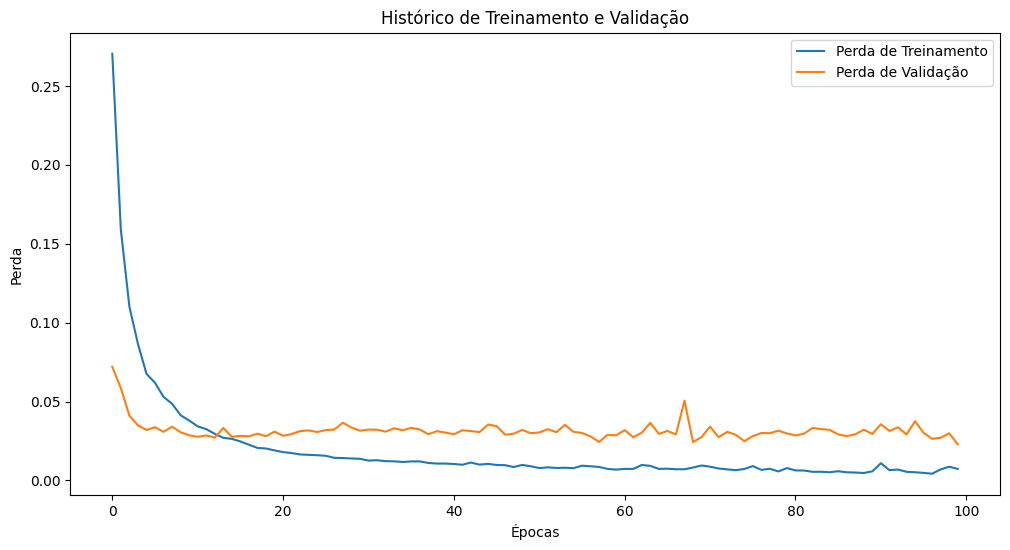

In [81]:
plt.figure(figsize=(12, 6))

# Plotando a perda de treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')

# Plotando a perda de validação
plt.plot(history.history['val_loss'], label='Perda de Validação')

# Adicionando título e legendas
plt.title('Histórico de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibindo o gráfico
plt.show()

In [84]:
# Fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo a normalização para obter os valores reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


ValueError: non-broadcastable output operand with shape (2832,1) doesn't match the broadcast shape (2832,14)

### 4. Problemas de RNNs: Desvanecimento e Explosão de Gradientes

#### Desafios com Gradientes em RNNs

As Redes Neurais Recorrentes (RNNs) enfrentam dois problemas principais durante o treinamento: desvanecimento de gradientes e explosão de gradientes. Ambos os problemas ocorrem devido à maneira como os gradientes são propagados através do tempo na rede.

- **Problemas de Desvanecimento de Gradientes**
  - **Descrição**: Ocorre quando os gradientes dos erros em relação aos pesos tornam-se extremamente pequenos durante a propagação retroativa (backpropagation through time - BPTT).
  - **Causa**: Quando a função de ativação utilizada tem derivadas pequenas (como a tanh e a sigmoid), os gradientes podem diminuir exponencialmente à medida que são propagados para trás ao longo de muitos passos temporais.
  - **Impacto**: Pesos nas camadas iniciais da rede são ajustados muito pouco, resultando em uma aprendizagem lenta ou estagnada para essas camadas. A rede tem dificuldade em aprender dependências de longo prazo.

- **Problemas de Explosão de Gradientes**
  - **Descrição**: Ocorre quando os gradientes dos erros em relação aos pesos tornam-se extremamente grandes durante a BPTT.
  - **Causa**: Quando os pesos da rede são grandes ou quando a função de ativação tem derivadas grandes, os gradientes podem aumentar exponencialmente à medida que são propagados para trás ao longo de muitos passos temporais.
  - **Impacto**: Pesos nas camadas iniciais da rede são ajustados excessivamente, resultando em atualizações instáveis dos pesos e em possíveis falhas no treinamento.

#### Técnicas para Mitigar Desafios

Para lidar com os problemas de desvanecimento e explosão de gradientes em RNNs, várias técnicas podem ser aplicadas:

- **Métodos de Regularização**
  - **Dropout**: Uma técnica que consiste em desligar (definir como zero) aleatoriamente algumas unidades na rede durante o treinamento. Isso ajuda a prevenir o overfitting e pode estabilizar a atualização dos pesos.
  - **Regularização L2**: Adiciona uma penalidade ao custo total da rede baseada na magnitude dos pesos. Isso ajuda a manter os pesos pequenos e estabiliza a propagação dos gradientes.

- **Uso de Funções de Ativação Apropriadas**
  - **ReLU (Rectified Linear Unit)**: Funciona bem para evitar desvanecimento de gradientes, mas pode levar à explosão de gradientes se não for combinado com outras técnicas de normalização.
  - **Leaky ReLU**: Uma variação do ReLU que permite pequenos valores negativos, ajudando a manter um fluxo de gradientes mesmo para neurônios que, de outra forma, estariam inativos.

- **Normalização de Gradientes**
  - **Clipping de Gradientes**: Limita o valor máximo dos gradientes durante a BPTT. Quando os gradientes excedem um determinado limiar, eles são ajustados para esse valor limite. Isso ajuda a prevenir a explosão de gradientes.
  - **Batch Normalization**: Normaliza a entrada de cada camada com base nas estatísticas de mini-batches durante o treinamento. Isso ajuda a estabilizar e acelerar a convergência.




## Referências
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.
- Olah, C. (2015). Understanding LSTM Networks. [Link para o artigo](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [ ]:
# Plotando os resultados
plt.figure(figsize=(12, 6))
train_range = range(time_step, time_step + len(train_predict))
test_range = range(time_step + len(train_predict), time_step + len(train_predict) + len(test_predict))
plt.plot(train_range, y_train, label='Real de treino', color='green')
plt.plot(test_range, y_test, label='Real de teste', color='green')
plt.plot(train_range, train_predict, label='Previsões de treino')
plt.plot(test_range, test_predict, label='Previsões de teste')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
regression_metrics(y_test, test_predict)

In [ ]:
regression_metrics(y_train, train_predict)